Мною было выбрано распределение $\chi^2$ (хи-квадрат) с $k$ степенями свободы, при этом $k$ $\in$ $\mathbb{N}$. Плотность вероятности для данного распределения выражается формулой:

$$
  \Large f(x, k) = \dfrac{1}{2^{k/2} \cdot \Gamma(k / 2)} \cdot x^{{k / 2} - 1} \cdot e^{-x / 2}
$$



In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid") 
%matplotlib inline

In [2]:
# Определение исходных значений параметров
num_samples = [5, 10, 30, 50, 100, 1000]     # Различное количество выборок
sample_size = 1000                           # Объём выборок

# В случае распределения Хи-квадрат параметр - кол-во степеней свободы, k
# Весь код в настоящем ноутбуке работает для произвольных значений k (с условием k > 0)
k = 5

x = np.linspace(0, 10*k, 10**5)      

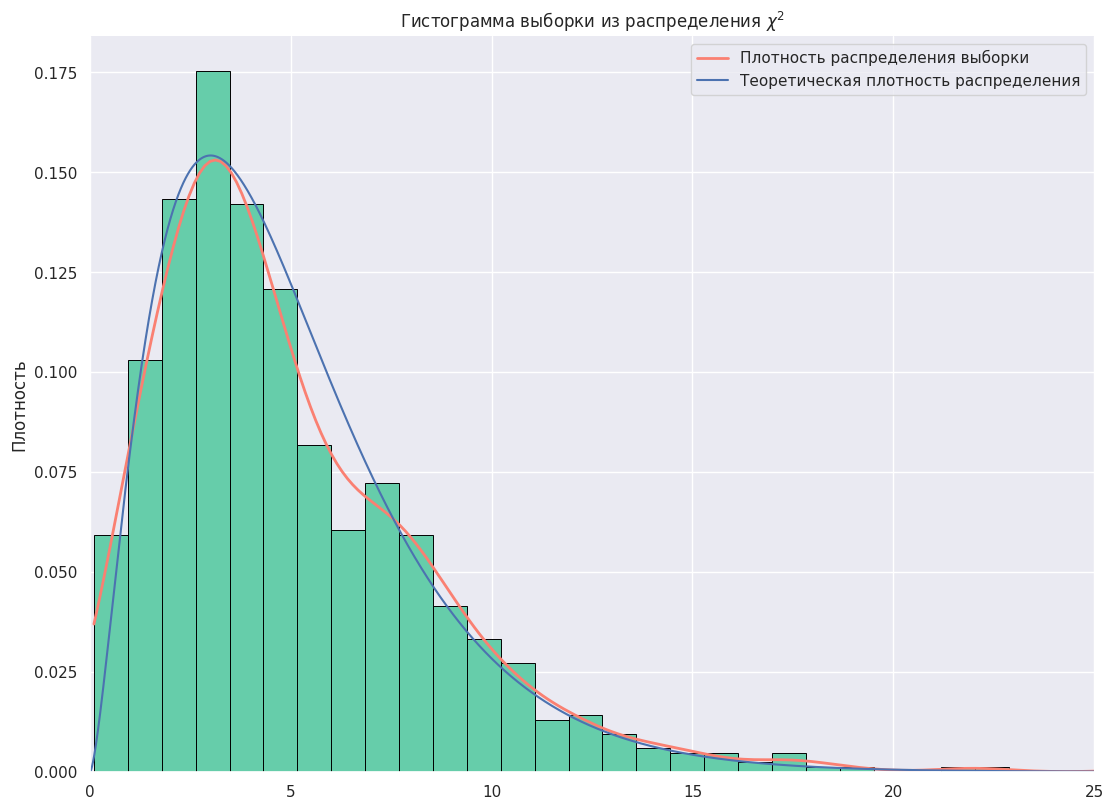

In [3]:
# Определение среднего и дисперсии распределения Хи-квадрат 
mean_chisquare, variance_chisquare = scipy.stats.chi2.stats(k, moments='mv')

# Генерация выборки из распределения Хи-квадрат
one_sample = scipy.stats.chi2.rvs(k, size=sample_size)

# Построение гистограммы полученной выборки
sns.displot(data=one_sample, kde=True, stat="density", line_kws=dict(linewidth=2), color='salmon', 
            facecolor='mediumaquamarine', edgecolor='black', linewidth=0.7, height=8, 
            aspect=1.4).set(title="Гистограмма выборки из распределения $\chi^2$", ylabel="Плотность")
plt.plot(x, scipy.stats.chi2(k).pdf(x))

plt.legend(["Плотность распределения выборки", "Теоретическая плотность распределения"])
plt.xlim(0, 5*k);

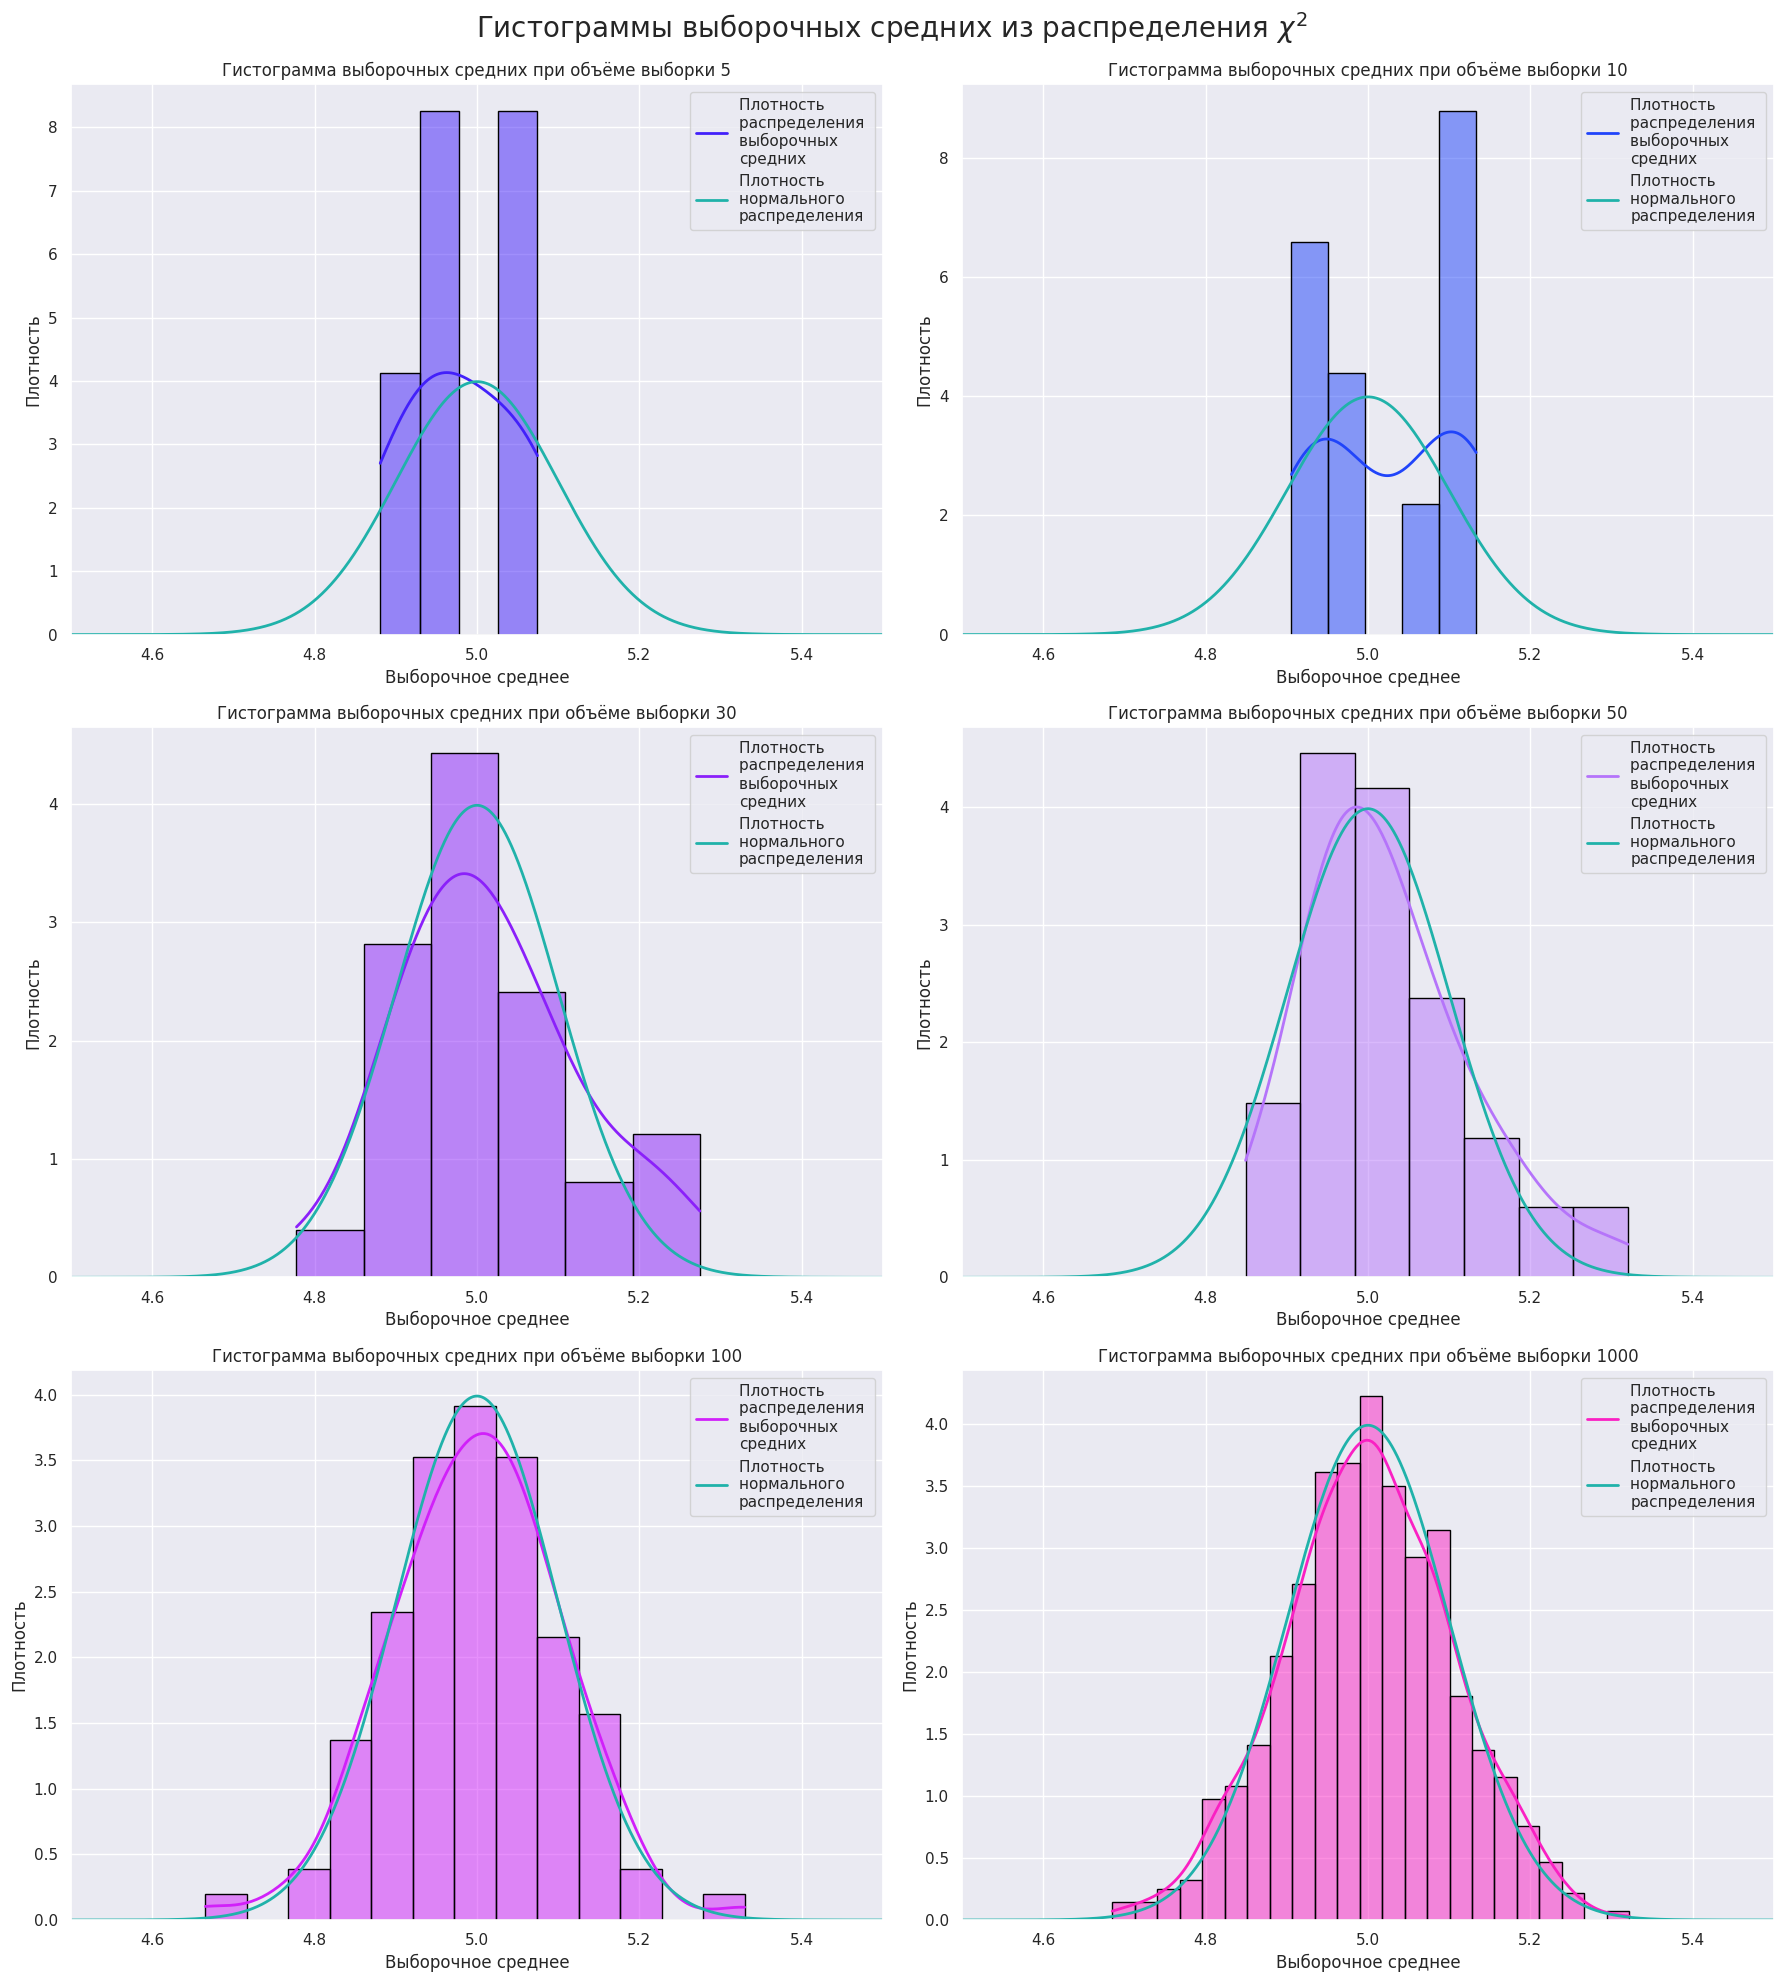

In [4]:
fig, ax = plt.subplots(3, 2, figsize=(18, 20))
ax = ax.ravel()

colors = ["#4220FA", "#2044FA", "#8B20FA", "#B574FA", "#D120FA", "#FA20C3"] # кастомные цвета

for n, i in zip(num_samples, range(len(num_samples))):
    # Генерация выборок из распределения Хи-квадрат 
    samples_chisquare = np.random.chisquare(k, (sample_size, n))
    # Расчёт выборочного среднего для каждой выборки
    chisquare_samples_mean = np.mean(samples_chisquare, axis=0)
    # Построение гистограмм для выборочных средних в зависимости от объёма выборки n
    sns.histplot(x=chisquare_samples_mean, bins="auto", kde=True, stat="density", color=colors[i], line_kws=dict(linewidth=2), 
                 edgecolor='black', linewidth=1, ax=ax[i]).set(title=f"Гистограмма выборочных средних при объёме выборки {n}", 
                                                               xlabel="Выборочное среднее", ylabel="Плотность")
    # Построение графика плотности нормального распределения поверх каждой гистограммы
    ax[i].plot(x, scipy.stats.norm(loc=mean_chisquare, scale=np.sqrt(variance_chisquare / sample_size)).pdf(x), 
              color="lightseagreen", lw=2)
    
    ax[i].legend([f"Плотность \nраспределения \nвыборочных \nсредних", f"Плотность \nнормального \nраспределения"])
    # При изменении k в некоторых случаях графики будут нагляднее, если либо закомментировать строку, либо изменить множитель
    ax[i].set_xlim(mean_chisquare - 0.1*mean_chisquare, mean_chisquare + 0.1*mean_chisquare)
    
fig.suptitle(r"Гистограммы выборочных средних из распределения $\chi^2$", y=0.99, size=20)   
fig.tight_layout()

Из гистограмм видно, что точность аппроксимации распределения выборочных средних нормальным распределением возрастает с увеличием объёма выборки. В среднем, адекватная аппроксимация достигается уже при объёме выборки $n = 100$.